In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")


In [2]:

def analyze_wine(df, wine_name):
 
    print(f"\n\n===== Analysis for {wine_name} wine =====\n")

    print("Shape:", df.shape)
    print("\nMissing values:\n", df.isnull().sum(), "\n")
     
    df.hist(bins=20, figsize=(12,10))
    plt.suptitle(f"{wine_name} - Histograms")
    plt.show()
     
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)
    plt.title(f"{wine_name} - Boxplots of Features")
    plt.show()
     
    plt.figure(figsize=(6,4))
    sns.countplot(x='quality', data=df)
    plt.title(f"{wine_name} - Quality Distribution")
    plt.show()
     
    corr = df.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"{wine_name} - Correlation Matrix")
    plt.show()


    plt.figure(figsize=(6,4))
    sns.scatterplot(x='pH', y='density', hue='quality', data=df, palette='viridis')
    plt.title('pH vs Density colored by Quality')
    plt.show()
     

    df['pH_density'] = df['pH'] * df['density']


    X = df.drop('quality', axis=1)
    y = df['quality']
     
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )      
 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)
 
 
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
     
     
    def report_metrics(y_true, y_pred):
        mae  = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2   = r2_score(y_true, y_pred)
        return mae, rmse, r2
     
    mae, rmse, r2 = report_metrics(y_test, y_pred)
 
    print("Linear Regression Test metrics:")
    print(f"MAE  = {mae:.4f}")
    print(f"RMSE = {rmse:.4f}")
    print(f"R2   = {r2:.4f}")

    residuals = y_test - y_pred

    # رسم نمودار پسماندها
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Quality")
    plt.ylabel("Residuals")
    plt.title(f"{wine_name} - Residuals Plot (Ridge)")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.kdeplot(residuals,   color='blue', alpha=0.8)
    plt.xlabel('Residual')
    plt.ylabel('Density')
    plt.title('Distribution of Residuals (Kernel Density Plot)')
    plt.show()
 


In [3]:

def analyze_combined_wine(df_red, df_white):
   
    df_red2   = df_red.copy()
    df_white2 = df_white.copy()
    df_red2['wine_type']   = 'red'
    df_white2['wine_type'] = 'white'
     
    df_combined = pd.concat([df_red2, df_white2], ignore_index=True)
    print("===== Combined EDA on 'wine_type' =====")
     
    plt.figure(figsize=(6,4))
    sns.countplot(x='wine_type', data=df_combined)
    plt.title("Distribution of Wine Types")
    plt.show()
     
    plt.figure(figsize=(8,5))
    sns.countplot(x='quality', hue='wine_type', data=df_combined)
    plt.title("Quality Distribution by Wine Type")
    plt.show()
     
    df_model = pd.get_dummies(df_combined, columns=['wine_type'], drop_first=True)
  
     
    analyze_wine(df_model, "Combined (with wine_type dummy)")



===== Analysis for Red wine =====

Shape: (1599, 12)

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 



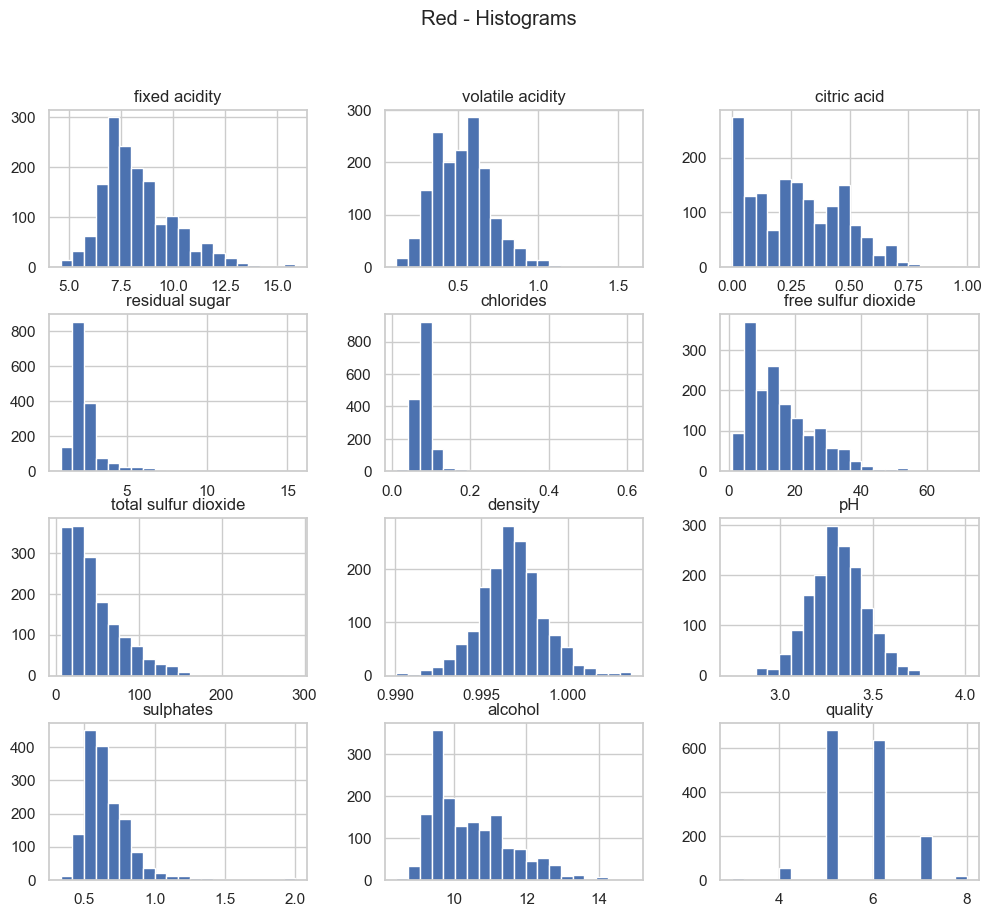

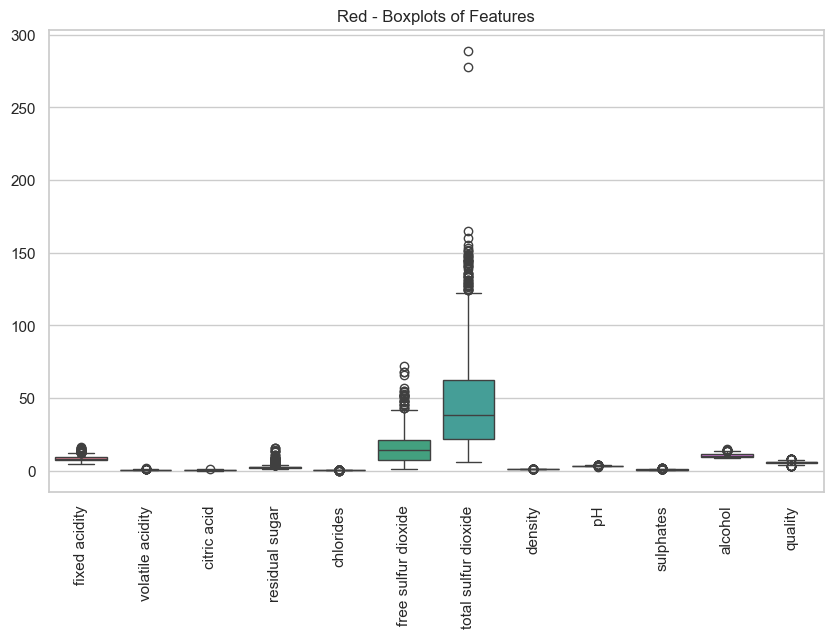

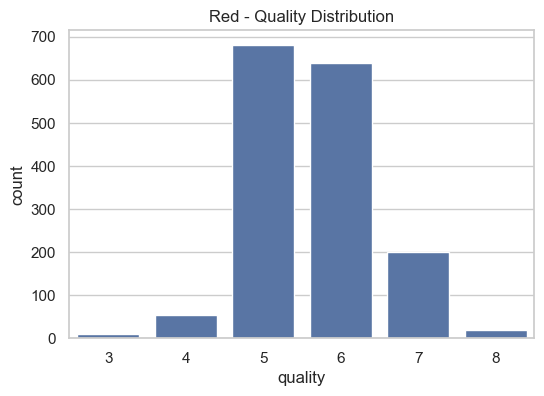

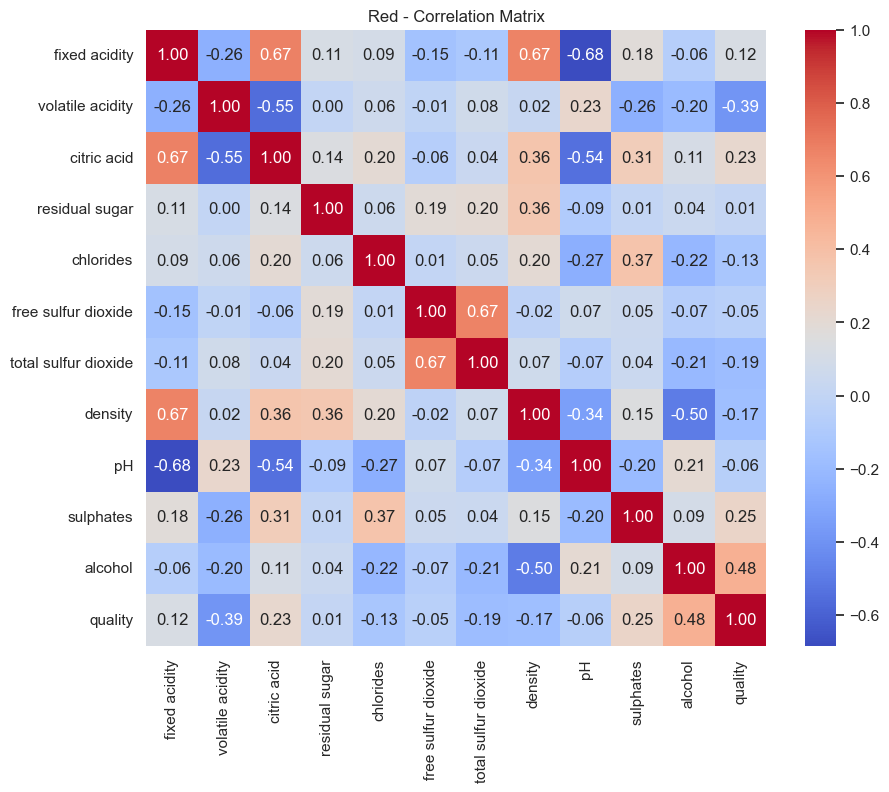

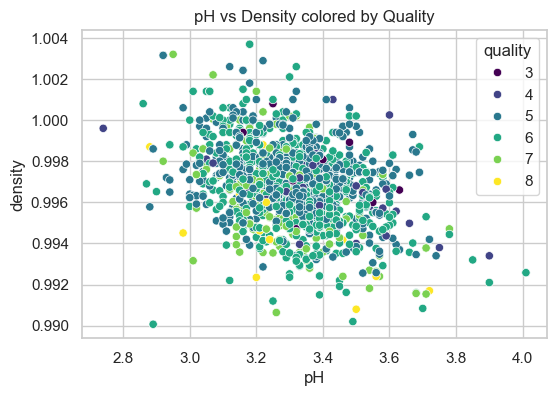

Linear Regression Test metrics:
MAE  = 0.5055
RMSE = 0.6254
R2   = 0.4016


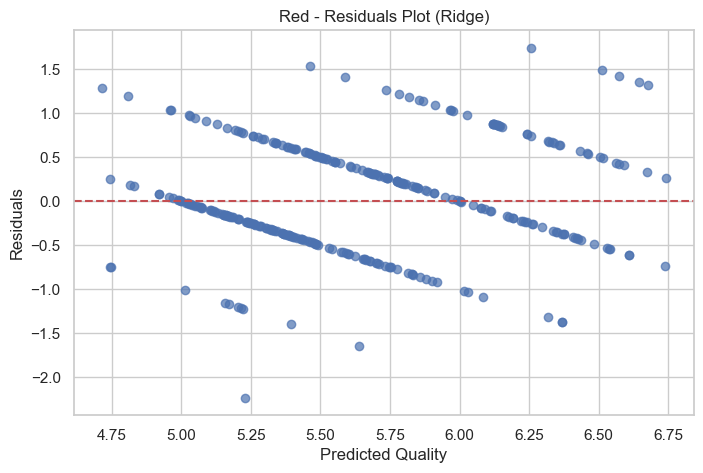

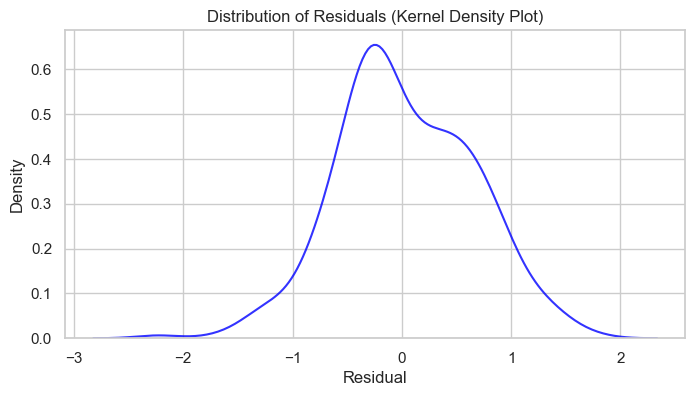



===== Analysis for White wine =====

Shape: (4898, 12)

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 



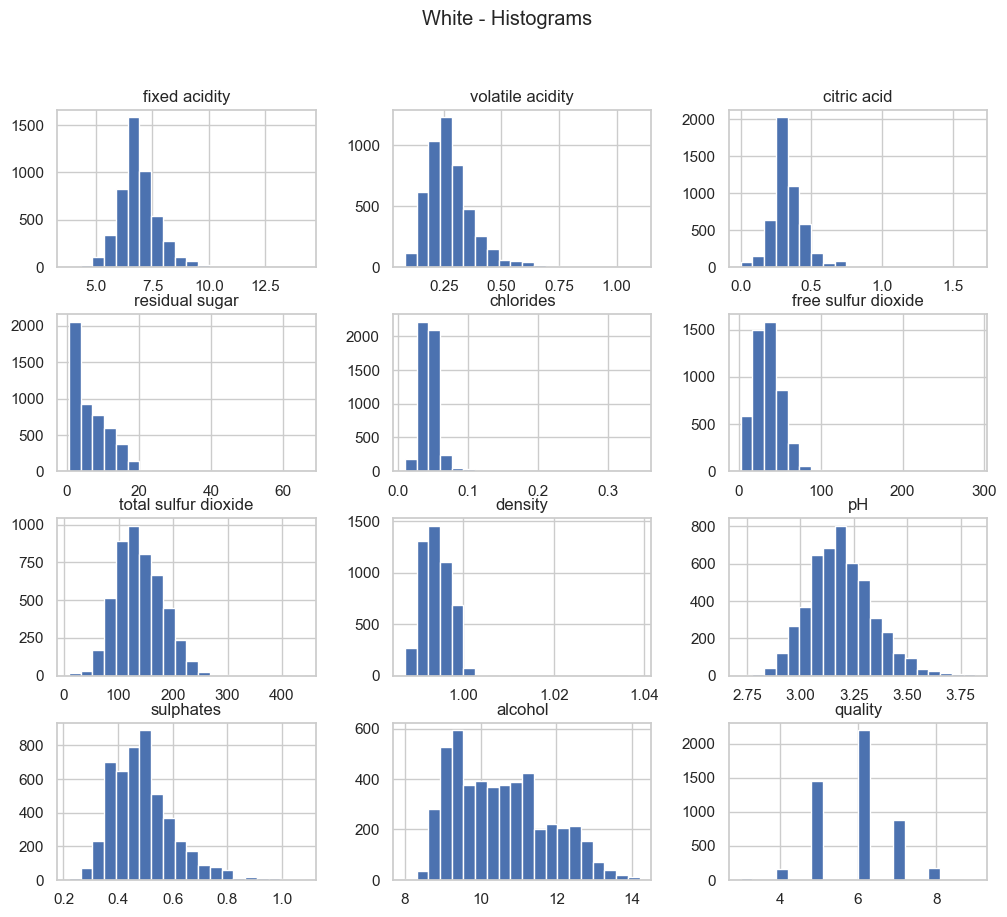

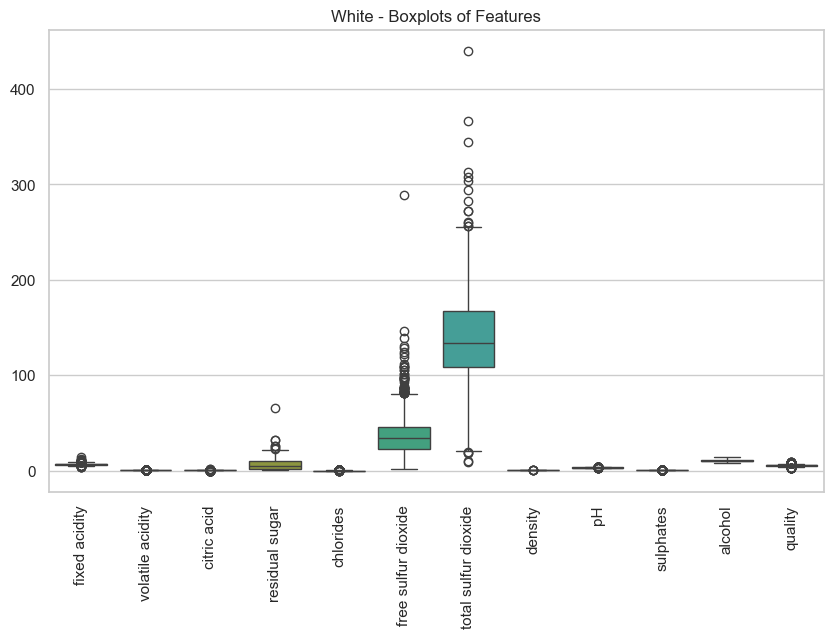

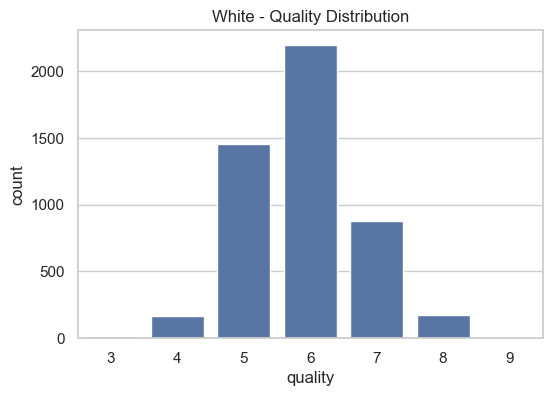

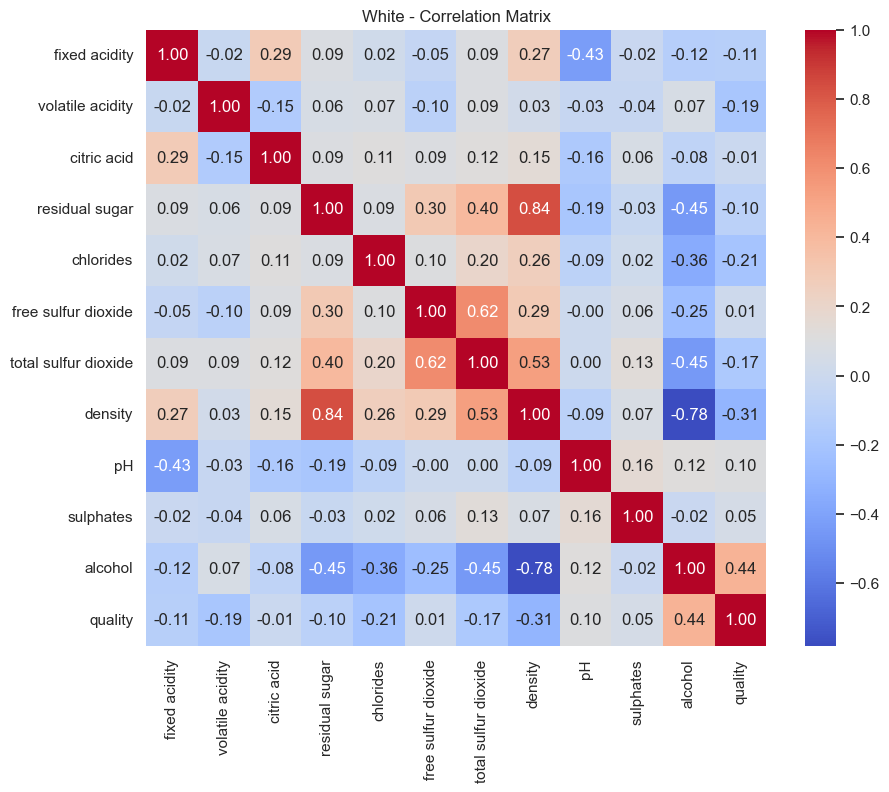

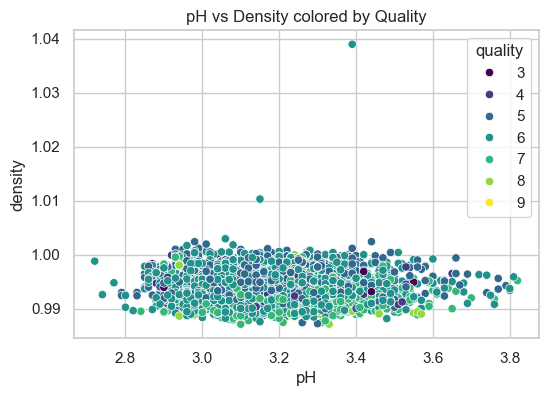

Linear Regression Test metrics:
MAE  = 0.5825
RMSE = 0.7535
R2   = 0.2669


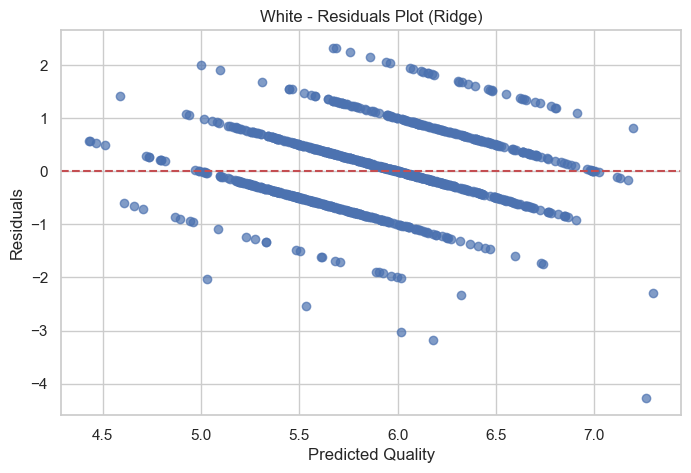

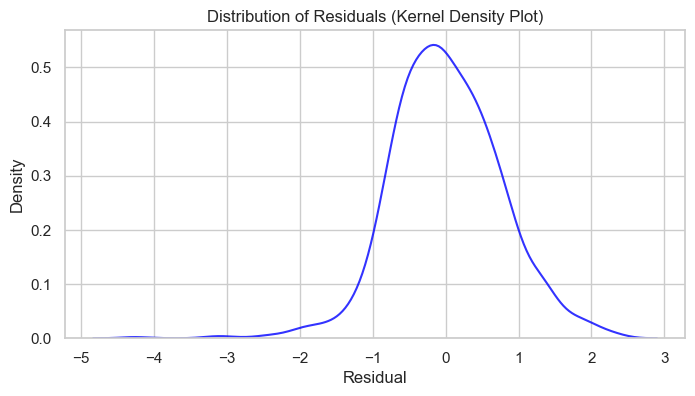

===== Combined EDA on 'wine_type' =====


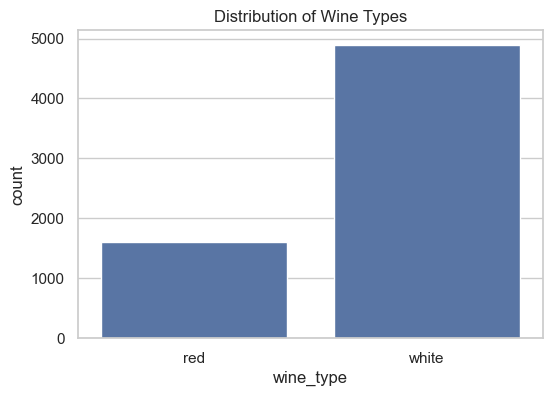

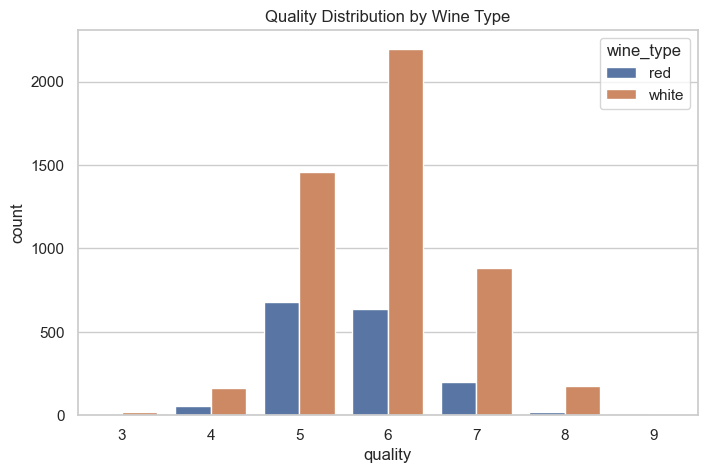



===== Analysis for Combined (with wine_type dummy) wine =====

Shape: (6497, 14)

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
pH_density              0
wine_type_white         0
dtype: int64 



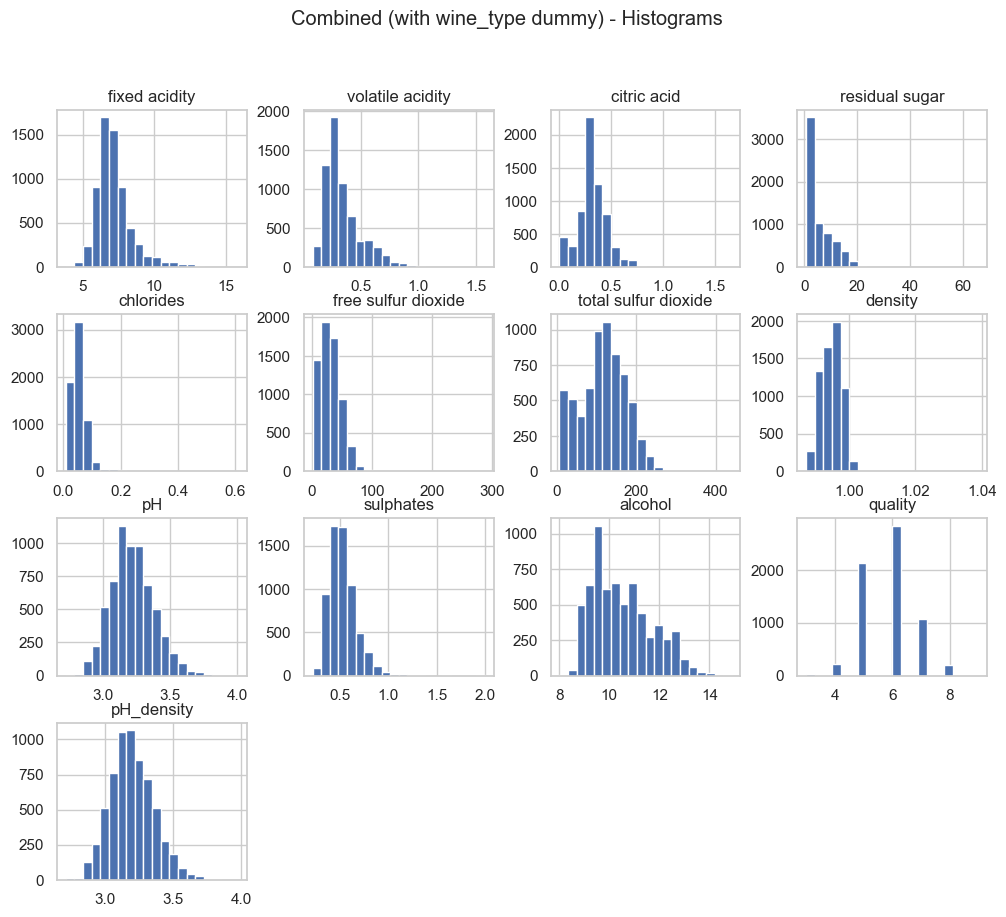

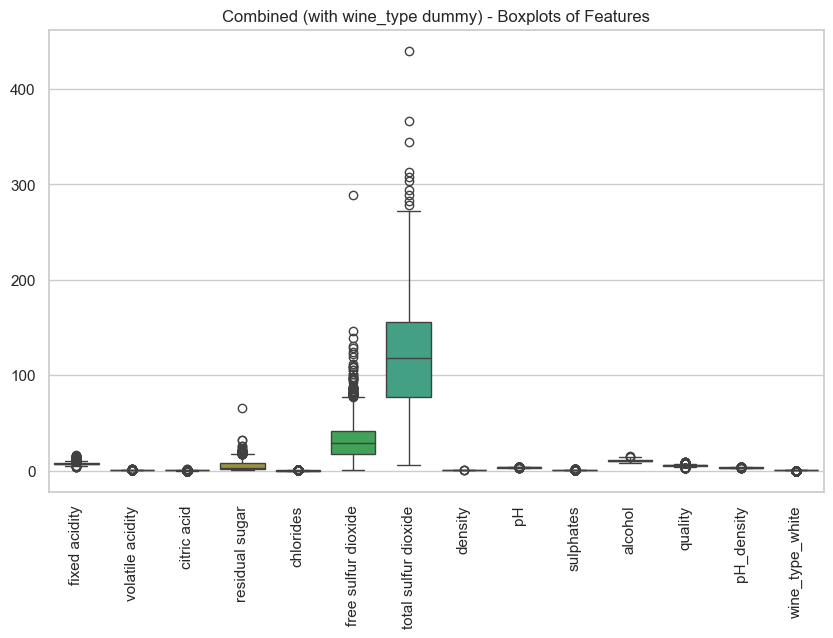

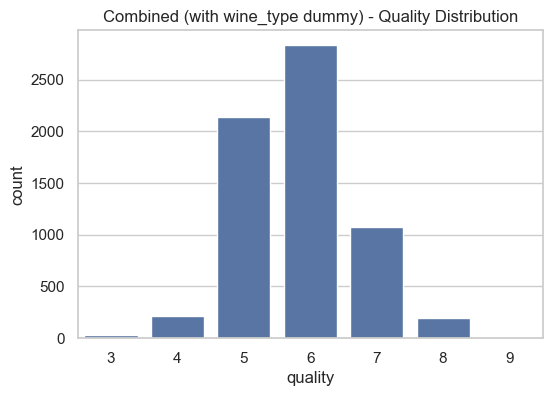

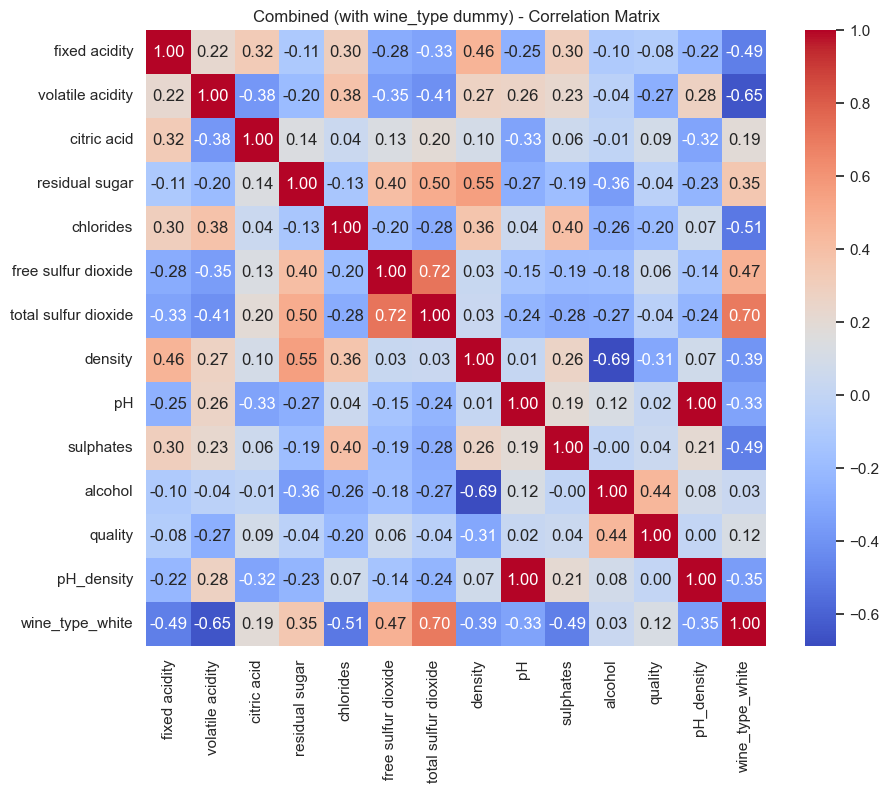

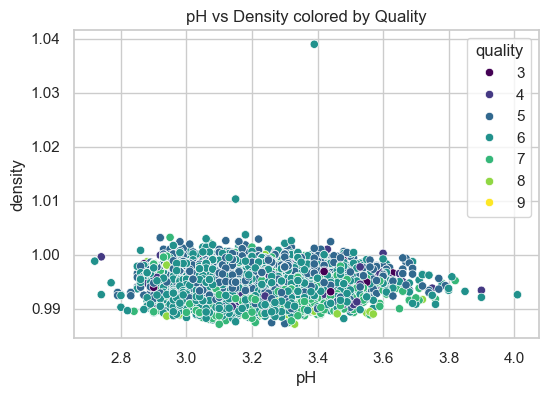

Linear Regression Test metrics:
MAE  = 0.5647
RMSE = 0.7365
R2   = 0.2655


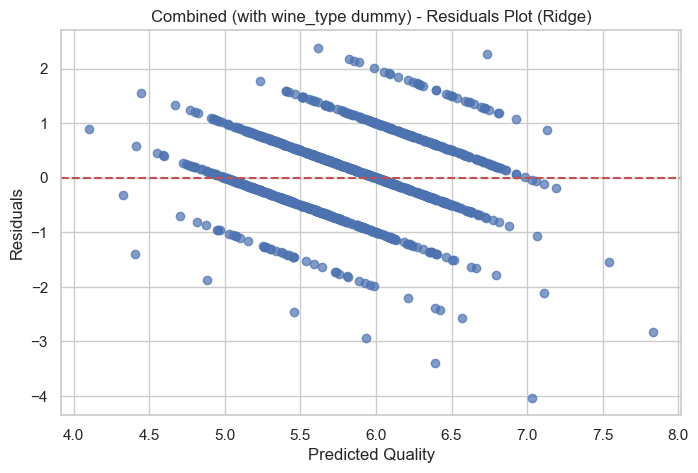

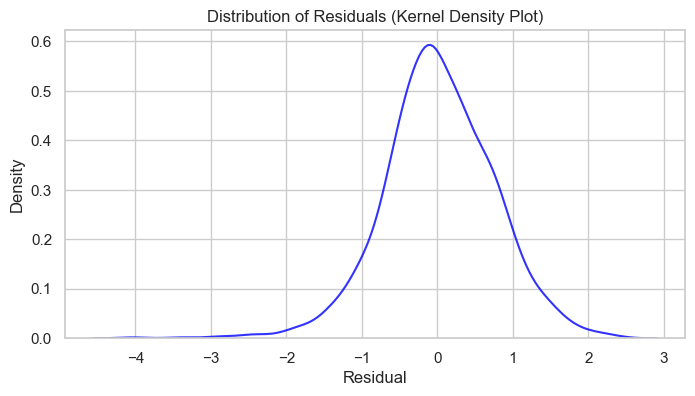

In [4]:
 
 
df_red = pd.read_csv('../data/winequality-red.csv', sep=';', encoding='utf-8')

df_white = pd.read_csv('../data/winequality-white.csv', sep=';', encoding='utf-8')
  
analyze_wine(df_red, "Red")
 
analyze_wine(df_white, "White")


analyze_combined_wine(df_red, df_white)